In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from glob import glob
import seaborn as sns
from tqdm.auto import tqdm
from pathlib import Path
import configparser


palette = sns.set_palette("colorblind", color_codes=True)

font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)


In [2]:
class hashableDict(dict):
    def __hash__(self):
        return hash(tuple(sorted(self.items())))

In [4]:
results_path = '../results'
scaling_test = 'inference-colocated-scaling'
run_path = 'run-2023-05-19-19:58:44'
full_path = Path(results_path, scaling_test, run_path)

configs = []

functions = ['put_tensor', 'run_script', 'run_model', 'unpack_tensor']

for run_cfg in full_path.rglob('run.cfg'):
    config = configparser.ConfigParser()
    config.read(run_cfg)
    configs.append(config)

df_list = []

for config in configs:
    timing_files = Path(config['run']['path']).glob('rank*.csv')
    df_config_list = []
    for timing_file in timing_files:
        tmp_df = pd.read_csv(timing_file, header=0, names=["rank", "function", "time"])
        for key, value in config._sections['attributes'].items():
            tmp_df[key] = value
        df_list.append(tmp_df)

df = pd.concat(df_list, ignore_index=True)

    
    

In [5]:
df

,rank,function,time,colocated,pin_app_cpus,client_total,client_per_node,client_nodes,database_nodes,database_cpus,database_threads_per_queue,batch_size,device,num_devices,language
0,1,put_tensor,0.006750,1,1,24,24,1,1,12,2,96,GPU,1,cpp
1,1,run_script,0.005202,1,1,24,24,1,1,12,2,96,GPU,1,cpp
2,1,run_model,0.009483,1,1,24,24,1,1,12,2,96,GPU,1,cpp
3,1,unpack_tensor,0.000099,1,1,24,24,1,1,12,2,96,GPU,1,cpp
4,1,put_tensor,0.007342,1,1,24,24,1,1,12,2,96,GPU,1,cpp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91651,7,run_script,0.029790,1,1,96,96,1,1,12,2,96,GPU,1,cpp
91652,7,run_model,0.028306,1,1,96,96,1,1,12,2,96,GPU,1,cpp
91653,7,unpack_tensor,0.000410,1,1,96,96,1,1,12,2,96,GPU,1,cpp
91654,7,loop_time,7.681030,1,1,96,96,1,1,12,2,96,GPU,1,cpp


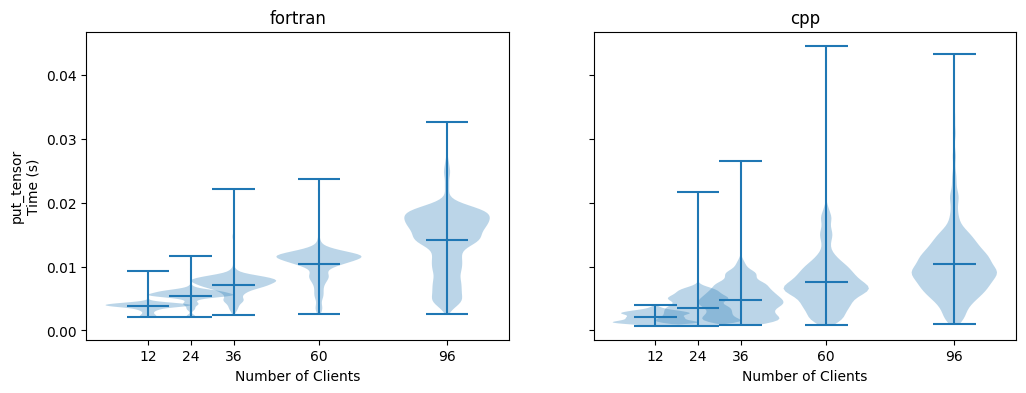

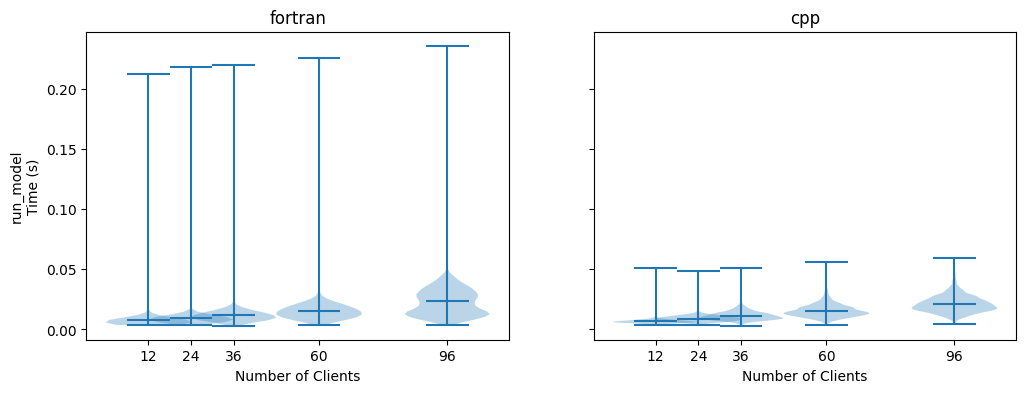

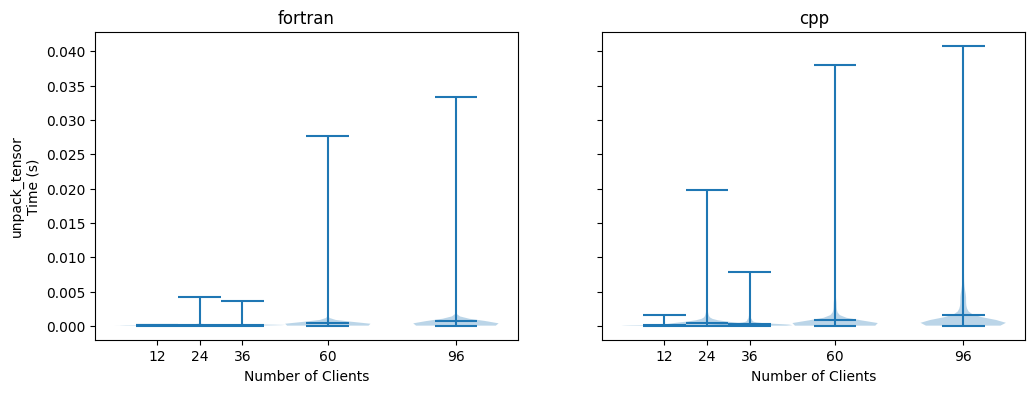

In [145]:
violin_opts = dict(        
    showmeans = True,
    showextrema = True,        
)

plt.style.use('default')

ordered_client_total = sorted(df['client_total'].unique())

function_names = ['put_tensor', 'run_model', 'unpack_tensor']
languages = ['fortran', 'cpp']

for function_name in function_names:
    fig = plt.figure(figsize=[12,4])
    axs = fig.subplots(1,2,sharey=True)
    for i, language in enumerate(languages):
        language_df = df.groupby('language').get_group(language)
        function_df = language_df.groupby('function').get_group(function_name)[ ['client_total','time'] ]

        data = [function_df.groupby('client_total').get_group(client)['time'] for client in ordered_client_total]
        pos = [int(client) for client in ordered_client_total]
        axs[i].violinplot(data, pos, **violin_opts, widths=24)
        axs[i].set_xlabel('Number of Clients')
        axs[i].set_title(language)
        axs[i].set_xticks(pos)
    axs[0].set_ylabel(f'{function_name}\nTime (s)')
# plt.box(put_tensor_df['client_total'], put_tensor_df['time'])



['12', '24', '36', '60', '96']

In [ ]:
put_tensor_df

In [ ]:
put_tensor_df

In [ ]:
## Compare Fortran and C++

for key, value in run_data:
    value['client_total'] = 


fortran_dfs = {hashed_config:run_data[hashed_config] for hashed_config in hashed_configs if hashed_config['language']=='fortran'}
cpp_dfs = {hashed_config:run_data[hashed_config] for hashed_config in hashed_configs if hashed_config['language']=='cpp'}

fields = ["put_tensor", "run_model", "unpack_tensor"]



# for field in fields:

    









In [ ]:
hashed_config

In [ ]:
config = configs[0]


df_list = []
for timing_file in timing_files:
    df_list.append(pd.read_csv(timing_file, header=0, names=["rank", "function", "time"]))


In [ ]:
df = pd.concat(df_list, ignore_index=True)

In [ ]:
df.groupby('function').get_group()

In [ ]:
n_clients = [12,24,48,96]
n_nodes = [1]
DB_cpus = 12
db_tpq = 2

aggregate = False

df_dbs = dict()
infer_path = '../results/inference-colocated-scaling'
run_paths = glob(os.path.join(infer_path,'run-2023*'))

functions = ['put_tensor', 'run_script', 'run_model', 'unpack_tensor']

dfs = { path:dict() for path in run_paths }

for run_path in run_paths:
    base_path = run_path 
    for n_node in n_nodes:

        for n_client in n_clients: 
            path_roots = os.path.join(base_path, f'infer-sess-colo-N{n_node}-T{n_client}-DBN1-DBCPU{DB_cpus}-DBTPQ{db_tpq}-*')
            for path_root in path_roots:
            path = glob(path_root)[0]
            files = os.listdir(path)
            
            function_times = {}

            for file in files:
                if '.csv' in file and 'rank_' in file:
                    fp = os.path.join(path, file)
                    function_rank_times = {}
                    with open(fp) as f:
                        for i, line in enumerate(f):
                            vals = line.split(',')
                            if vals[1] not in functions:
                                continue
                            if not aggregate:
                                if vals[1] in function_times.keys():
                                    function_times[vals[1]].append(float(vals[2]))
                                else:
                                    function_times[vals[1]] = [float(vals[2])]
                            else:
                                if vals[1] in function_rank_times.keys():
                                    function_rank_times[vals[1]] += float(vals[2])
                                else:
                                    function_rank_times[vals[1]] = float(vals[2])
                                
                    for k,v in function_rank_times.items():
                        if k in function_times:
                            function_times[k].append(v)
                        else:
                            function_times[k] = [v]
                
            data_df = pd.DataFrame(function_times)
            dfs[run_path][n_client] = data_df

        labels = ["put_tensor", "unpack_tensor", "run_model", "run_script"]
        for n_client in n_clients:
            dfs[run_path][n_client]['total'] = np.sum([dfs[run_path][n_client][label] for label in labels],axis=0) 


In [ ]:
for run_path in run_paths:
    print(run_path)
    print(dfs[run_path][96].describe())

In [ ]:
for run_path in run_paths:
    print(run_path)
    print(dfs[run_path][96].describe())

In [ ]:
save = False
all_in_one = False
labels = ["put_tensor", "unpack_tensor", "run_model", "run_script", "total"]
palette = sns.set_palette("colorblind", color_codes=True)


dfs_plot = dfs[run_paths[1]]

for style in tqdm(["light", "dark"], desc="Plotting"):
    if style == "light":
        plt.style.use("default")
    else:
        plt.style.use("dark_background")

    legend_entries = []

    color_short = "brgmy"

    aggregate_suffix = "_agg" if aggregate else ""
    plot_type = "violin"

    # Set subplot_index to None to plot to separate files, to 1 to have all plots in one
    subplot_index = 1 if all_in_one else None
    if subplot_index:
        plt.figure(figsize=(8*2,5*2+3))
    for label in tqdm(labels, desc=f"{style} style"):
        if subplot_index:
            ax = plt.subplot(2,2,subplot_index)
        else:
            fig, ax = plt.subplots(figsize=(8,5))

        data_list = [dfs_plot[n_client][label] for n_client in n_clients]
        
        if plot_type=="violin":
            plot = ax.violinplot(data_list, positions=n_clients, showextrema=True, showmeans=True, showmedians=True ,widths=12)
            [col.set_alpha(0.3) for col in plot["bodies"]]
            props_dict = dict(color=plot["cbars"].get_color().flatten())
            entry = plot["cbars"]
            legend_entries.append(entry)
        means = [np.mean(dfs_plot[n_client][label]) for n_client in n_clients]
        ax.plot(n_clients, means, ':', color=props_dict['color'], alpha=0.5)

        
        ax.set_xticks(n_clients, minor=False)
        ax.set_xticklabels([rank for rank in n_clients], fontdict={'fontsize': 12})

        plt.title(label)
        plt.xlabel("MPI Ranks")
        plt.ylabel("Time [s]")
        # plt.ylim([0,0.06])
        # ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%2.2f'))

        plt.tight_layout()
        plt.draw()

        
        if not subplot_index:
            if save:
                plt.savefig(f"{label}_{plot_type}{aggregate_suffix}_{style}.pdf")
                plt.savefig(f"{label}_{plot_type}{aggregate_suffix}_{style}.png")
        else:
            subplot_index += 1

    if subplot_index and save:
        plt.savefig(f'all_in_one_{plot_type}{aggregate_suffix}_{style}.pdf')
        plt.savefig(f'all_in_one_{plot_type}{aggregate_suffix}_{style}.png')

In [ ]:
ax.violinplot?

In [ ]:
dfs[96].describe()

In [ ]:

dfs[96].describe?

In [ ]:
ax.violinplot?